In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [25]:
def sawtooth(x, T):
    y = x.copy() % T
    cond = np.where(y > T/2)
    y[cond] = (y - T)[cond]
    return y

In [26]:
def get_saw_tooth_periodic(cycles, interval, offset = 0):
    x = np.linspace(interval[0], interval[1], cycles * 2 + 1)
    y = np.empty((cycles * 2 + 1,))
    y[::2] = 1
    y[1::2] = -1
    y = y + offset
    return x, y

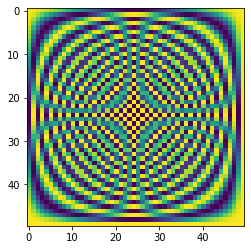

In [68]:
# trial for DFT matrix
N = 50 # number of samples

Z = np.exp(-2 * np.pi * 1j / N) # complex number dnoted by j

nk = np.ones((N, N)) * np.arange(1, N + 1).reshape((1, N)) * np.arange(1, N + 1).reshape((N, 1))
A = Z ** nk / np.sqrt(2 * np.pi)

plt.imshow(np.real(A))

In [84]:
def dft(y):
    N = y.size
    nk = np.ones((N, N)) * np.arange(1, N + 1).reshape((1, N)) * np.arange(1, N + 1).reshape((N, 1))
    Z = np.exp(-2 * np.pi * 1j /N)
    A = Z ** nk / np.sqrt(2 * np.pi)
    return np.matmul(A, y)

def dftinv(Y):
    N = Y.size
    nk = np.ones((N, N)) * np.arange(1, N + 1).reshape((1, N)) * np.arange(1, N + 1).reshape((N, 1))
    Z = np.exp(-2 * np.pi * 1j /N)
    Ainv = Z ** (-nk) * np.sqrt(2 * np.pi) / N
    return np.matmul(Ainv, Y)

In [91]:
def fft(y,binary = "",inv=False):
    n = int(y.size/2**(len(binary)))
    
    factor = 1
    if binary == "":
        factor = (1-inv+float(inv)/N)
    
    if n == 1:
        index = int(binary,2)
        return y[index]
    
    even = np.tile(fft(y,"0"+binary,inv),2)
    odd = np.tile(fft(y,"1"+binary,inv),2)
    
    wk = np.exp(np.pi*2j/n)**((1-2*inv)*np.arange(n))
    res = even + wk*odd
    return res*factor

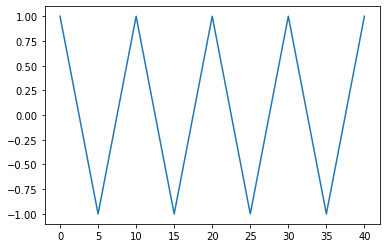

In [85]:
x, y = get_saw_tooth_periodic(4, [0, 40])
plt.plot(x, y)

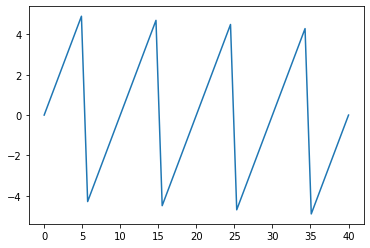

In [86]:
x = np.linspace(0,40,)
y = sawtooth(x,10)
plt.plot(x,y)

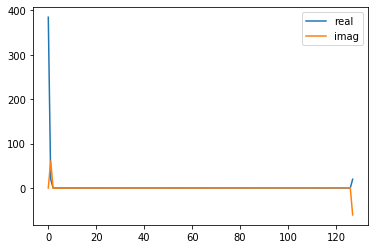

In [92]:
Y = dft(y)
plt.plot(np.real(Y), label='real')
plt.plot(np.imag(Y), label='imag')
plt.legend()

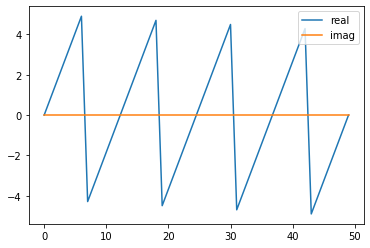

In [88]:
y = dftinv(Y)
plt.plot(np.real(y), label='real')
plt.plot(np.imag(y), label='imag')
plt.legend()

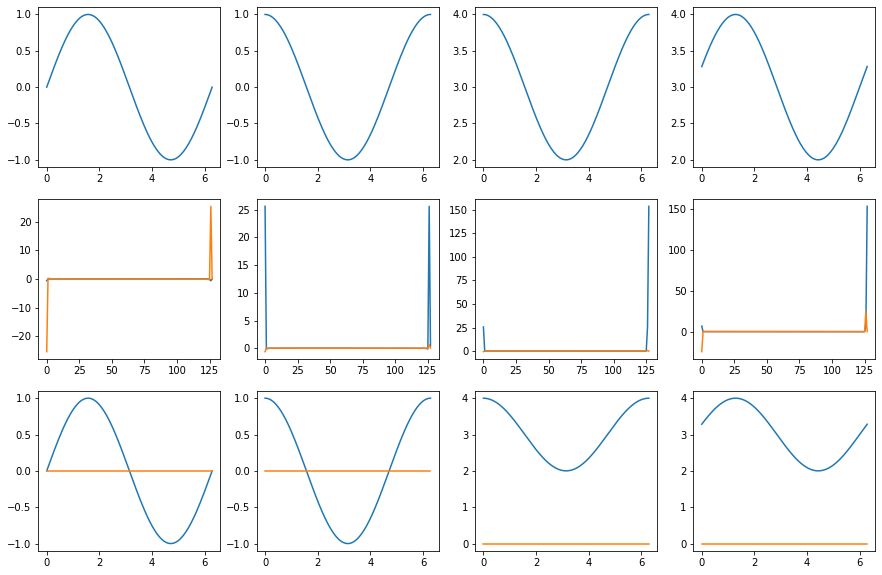

In [89]:
N = 128
t = np.linspace(0, 2 * np.pi, N)
g1 = np.sin(t)
g2 = np.cos(t)
g3 = 3.0 + np.cos(t)
g4 = 3.0 + np.cos(5 + t)

evals = [g1, g2, g3, g4]
coords = [t, t, t, t]

nfuncs = len(evals)
nplots = 3

plt.figure(figsize = (15, 10))

for c, y in enumerate(evals):
    plt.subplot(nplots, nfuncs, 0 * nfuncs + c + 1)
    x = coords[c]
    plt.plot(x, y)
    
    plt.subplot(nplots, nfuncs, 1 * nfuncs + c + 1)
    transform = dft(y)
    freqs = 2 * np.pi * np.arange(transform.size) / (x[-1] - x[0])
    plt.plot(freqs, np.real(transform))
    plt.plot(freqs, np.imag(transform))
    
    plt.subplot(nplots, nfuncs, 2 * nfuncs + c + 1)
    backtransform = dftinv(transform)
    plt.plot(x, np.real(backtransform))
    plt.plot(x, np.imag(backtransform))
    